# 目的：通过场所接收的签入数量，预测用户倾向

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 导入数据集

In [22]:
df = pd.read_csv("C:/Users/lx/Desktop/Low-MScThesis/BAReport - Dataset/foursquare-nyc-and-tokyo-check-ins/dataset_TSMC2014_TKY.csv")

# 统计分析

In [23]:
df1 = df

提取数据集中的场所信息【venueCategory】

In [24]:
df2 = df1['venueCategory']

In [25]:
df2

0                Cosmetics Shop
1         Ramen /  Noodle House
2             Convenience Store
3             Food & Drink Shop
4           Housing Development
                  ...          
573698              Music Venue
573699            Train Station
573700                 Tea Room
573701     Fast Food Restaurant
573702              Record Shop
Name: venueCategory, Length: 573703, dtype: object

将场所签入量进行数量统计，并按频率排序

In [26]:
df3 = df2.value_counts(ascending=True)

In [27]:
df3

Falafel Restaurant             1
Afghan Restaurant              1
Gluten-free Restaurant         1
Arepa Restaurant               1
Ski Area                       1
                           ...  
Japanese Restaurant        15680
Convenience Store          16833
Ramen /  Noodle House      17303
Subway                     41666
Train Station             200428
Name: venueCategory, Length: 247, dtype: int64

将数据集放入数据字典中

In [28]:
df4=dict(df3)
df4

{'Falafel Restaurant': 1,
 'Afghan Restaurant': 1,
 'Gluten-free Restaurant': 1,
 'Arepa Restaurant': 1,
 'Ski Area': 1,
 'Southern / Soul Food Restaurant': 1,
 'Pet Service': 2,
 'Swiss Restaurant': 2,
 'Mac & Cheese Joint': 2,
 'Argentinian Restaurant': 2,
 'Moroccan Restaurant': 3,
 'Ethiopian Restaurant': 4,
 'Market': 4,
 'Peruvian Restaurant': 5,
 'Synagogue': 5,
 'Cuban Restaurant': 5,
 'College Theater': 6,
 'African Restaurant': 6,
 'South American Restaurant': 6,
 'Burrito Place': 6,
 'Distillery': 7,
 'City': 7,
 'Portuguese Restaurant': 7,
 'Animal Shelter': 7,
 'Malaysian Restaurant': 8,
 'Latin American Restaurant': 8,
 'Storage Facility': 8,
 'Taco Place': 9,
 'Fish & Chips Shop': 9,
 'Flea Market': 10,
 'Newsstand': 11,
 'Castle': 11,
 'Scandinavian Restaurant': 12,
 'Housing Development': 12,
 'Cajun / Creole Restaurant': 12,
 'Fraternity House': 13,
 'Arts & Entertainment': 13,
 'Bridal Shop': 16,
 'Law School': 17,
 'Salad Place': 19,
 'Car Wash': 19,
 'Tanning Salon

将数据集放入列表中

In [29]:
df5 = list(df4.values())
df5

[1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 4,
 4,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 9,
 9,
 10,
 11,
 11,
 12,
 12,
 12,
 13,
 13,
 16,
 17,
 19,
 19,
 20,
 20,
 20,
 21,
 23,
 23,
 23,
 24,
 24,
 24,
 26,
 26,
 30,
 31,
 33,
 35,
 36,
 38,
 39,
 40,
 43,
 44,
 46,
 49,
 49,
 49,
 53,
 55,
 56,
 58,
 60,
 60,
 62,
 63,
 63,
 64,
 66,
 69,
 69,
 74,
 76,
 78,
 85,
 88,
 90,
 92,
 92,
 95,
 96,
 98,
 98,
 99,
 99,
 105,
 107,
 108,
 111,
 112,
 127,
 127,
 146,
 148,
 156,
 157,
 157,
 160,
 163,
 170,
 176,
 186,
 187,
 193,
 196,
 202,
 204,
 212,
 220,
 226,
 228,
 242,
 242,
 246,
 253,
 254,
 256,
 258,
 261,
 265,
 268,
 269,
 275,
 289,
 291,
 293,
 294,
 298,
 305,
 327,
 347,
 358,
 363,
 403,
 429,
 432,
 444,
 467,
 468,
 472,
 480,
 493,
 509,
 515,
 520,
 523,
 556,
 556,
 564,
 582,
 589,
 611,
 613,
 621,
 656,
 664,
 708,
 764,
 772,
 774,
 780,
 783,
 792,
 802,
 811,
 825,
 891,
 893,
 902,
 904,
 951,
 954,
 985,
 1070,
 1085,
 1089,
 1100,
 11

将统计范围值外的数据删除

In [30]:
for i in df5:
    if i > 13000:
        del i

# 作出图表

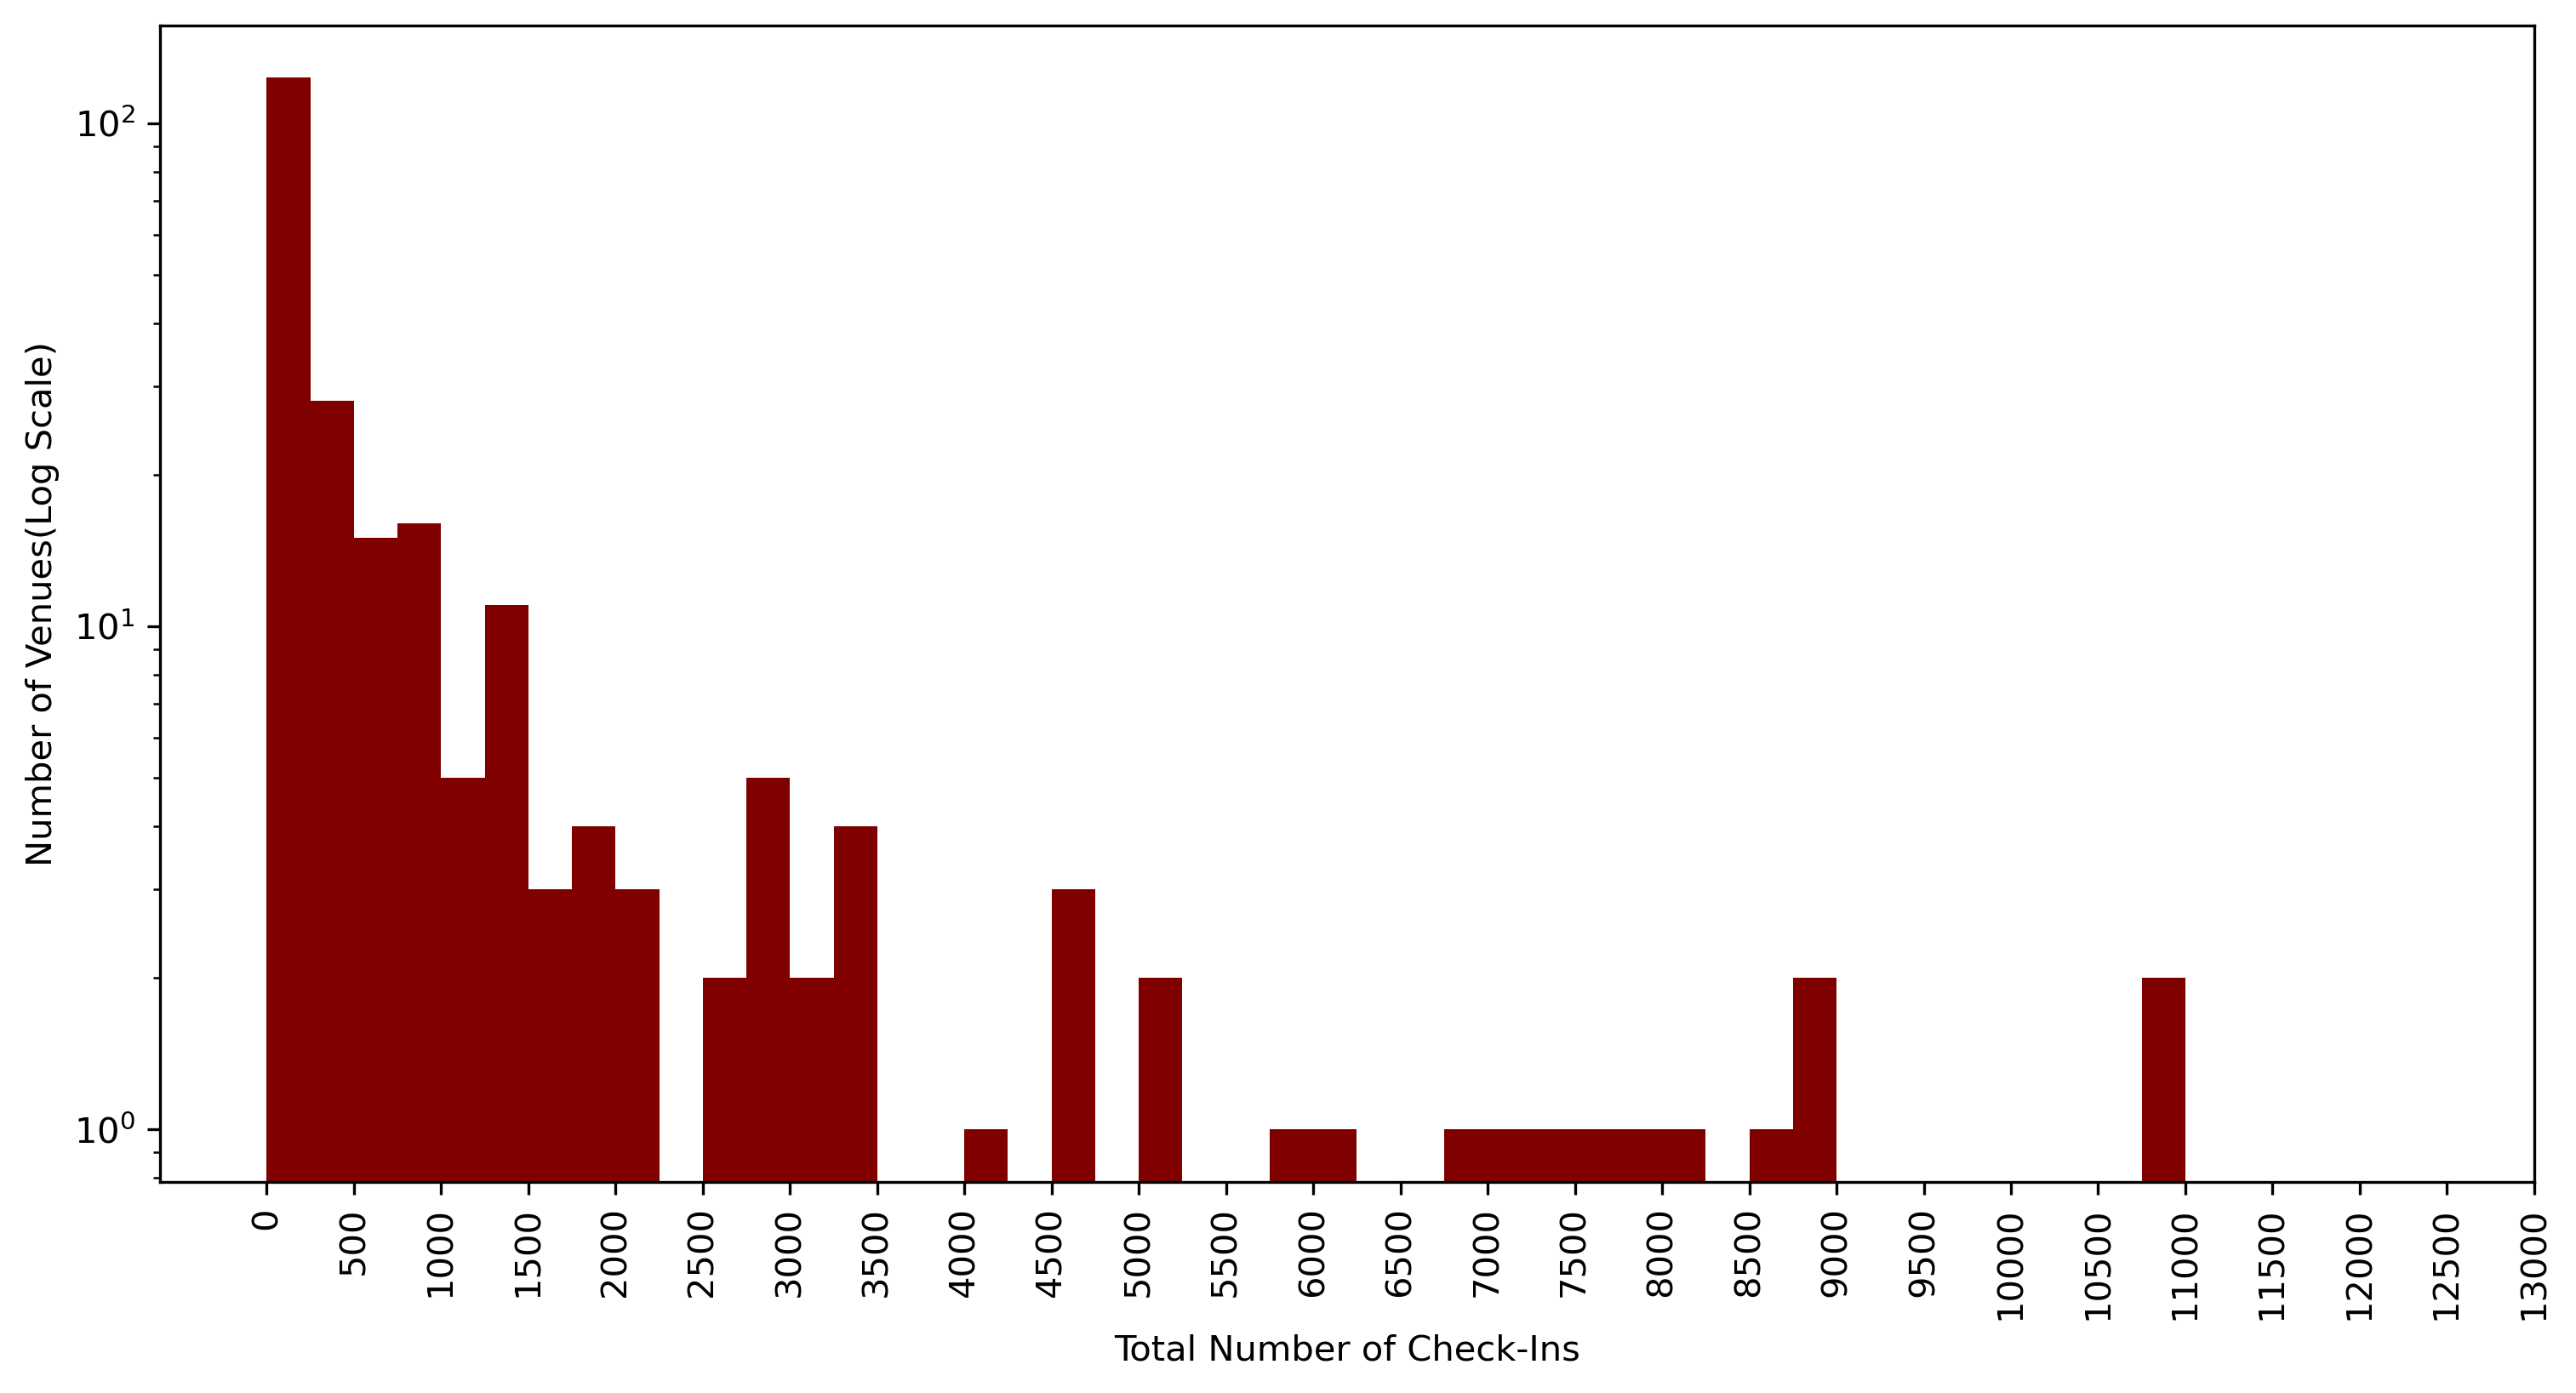

In [31]:
bins=np.arange(0,12500,250)
plt.hist(df5,bins,facecolor="maroon")
plt.xlabel("Total Number of Check-Ins")
plt.ylabel("Number of Venues(Log Scale)")
x1 = range(0,13500,500)
plt.xticks(x1,rotation=90)
plt.yscale('log')
plt.rcParams['figure.figsize']=(12.0,6.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.show()

# 结果分析：图中的直方图表明被访问的场所数量很少。超过60000个场所访问次数不到250次，只有少数热门场所累积了超过2000多个用户签入。根据这一观察结果，可以推断用户倾向于返回非常受欢迎的场所。因此，一个天真的算法，它总是建议最受欢迎的场馆，可以用作基线算法并与用于性能评估的其他预测模型。